# Final Taxonomic Classification Results

The final taxonomic classification data used in this notebook were generated using the following workflow (using Linux bash): 
- Generated initial taxonomic assignments from aggregated classifiers in `aggregate_classification.ipynb` (`agg_summary.tsv`).
- Selected all identified species with greater than 4000 assigned reads using the initial consensus assignments.
- Obtained the identified species' largest pangenomes from ProGenomes V3 and created a Centrifuger database.
- Classified the remaining unclassified reads against this refined database (`agg_summary_2.tsv`).

### Workflow:
- Combines the two classification results into final taxonomic result
- Visualizes both classification round results, final taxonomic result, and underrepresented species
***

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Data Preprocessing

In [2]:
classified_agg = r'data_output\agg_summary.tsv'
unclassified_agg = r'raw_data\classification_results\agg_summary_2.tsv'

In [3]:
cl_df = pd.read_csv(classified_agg, header = 0, sep = '\t')
un_df = pd.read_csv(unclassified_agg, header = 0, sep = '\t')
un_df.rename(columns = {'totalNumMatches': 'count'}, inplace = True)

print(cl_df.head())
print(un_df.head())

                              name   count  proportion
0           Stutzerimonas stutzeri  684172    0.624749
1               Acidovorax facilis   18039    0.016472
2           Pseudomonas aeruginosa   17210    0.015715
3             Sphingopyxis sp. FD7   15049    0.013742
4  Stutzerimonas chloritidismutans   14679    0.013404
                              name   count
0           Pseudomonas aeruginosa  889899
1  Stutzerimonas chloritidismutans  211828
2           Stutzerimonas stutzeri   42232
3               Pseudomonas putida   23909
4           Brevundimonas fluminis   22585


In [4]:
#create final aggregated result
un_df['proportion'] = un_df['count'] / un_df['count'].sum()

agg_df = pd.concat([cl_df[['name', 'count']], un_df[['name', 'count']]])
agg_df = agg_df.groupby('name')['count'].sum().reset_index()
agg_df['proportion'] = agg_df['count'] / agg_df['count'].sum()

print(un_df.head())
print(agg_df.head())

                              name   count  proportion
0           Pseudomonas aeruginosa  889899    0.666545
1  Stutzerimonas chloritidismutans  211828    0.158662
2           Stutzerimonas stutzeri   42232    0.031632
3               Pseudomonas putida   23909    0.017908
4           Brevundimonas fluminis   22585    0.016916
                                      name  count    proportion
0  'Mollugo disticha' phyllody phytoplasma      1  4.114876e-07
1                  Abeliophyllum distichum      1  4.114876e-07
2                    Abiotrophia defectiva      1  4.114876e-07
3                           Absidia glauca      1  4.114876e-07
4                   Abundisporus violaceus      1  4.114876e-07


## Visualization

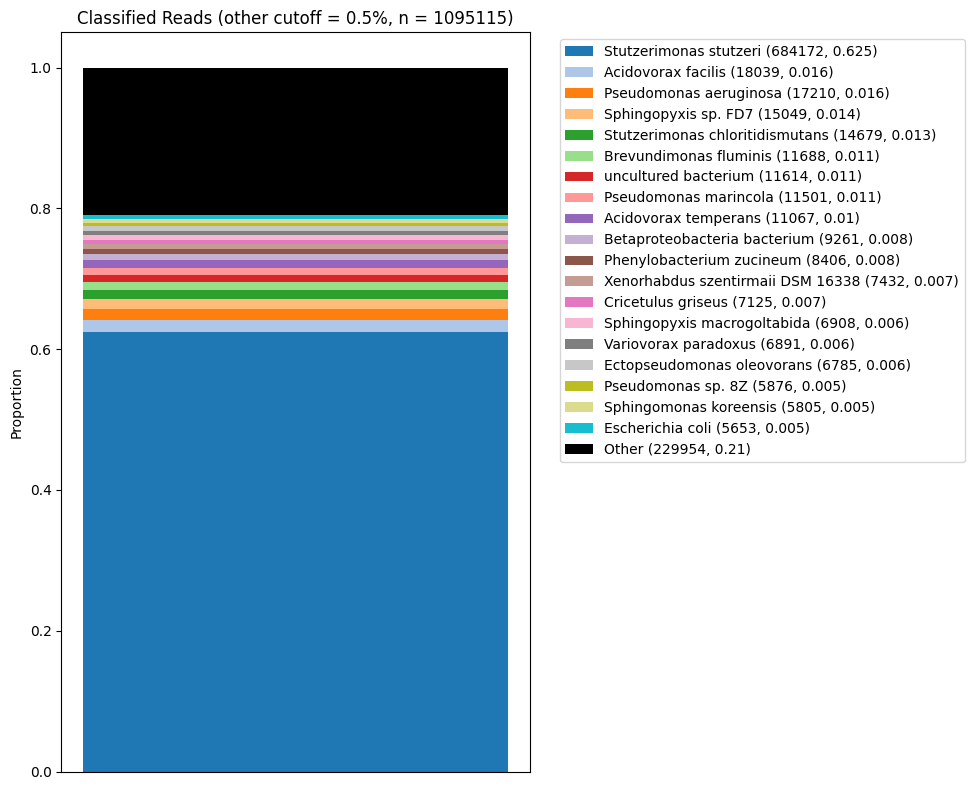

C:\Users\yoche\OneDrive - The University of Texas at Austin\Documents\Cenik\metaribo-seq_fixed\src\taxo_utils.py:294: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([df_valid, df_other_row])


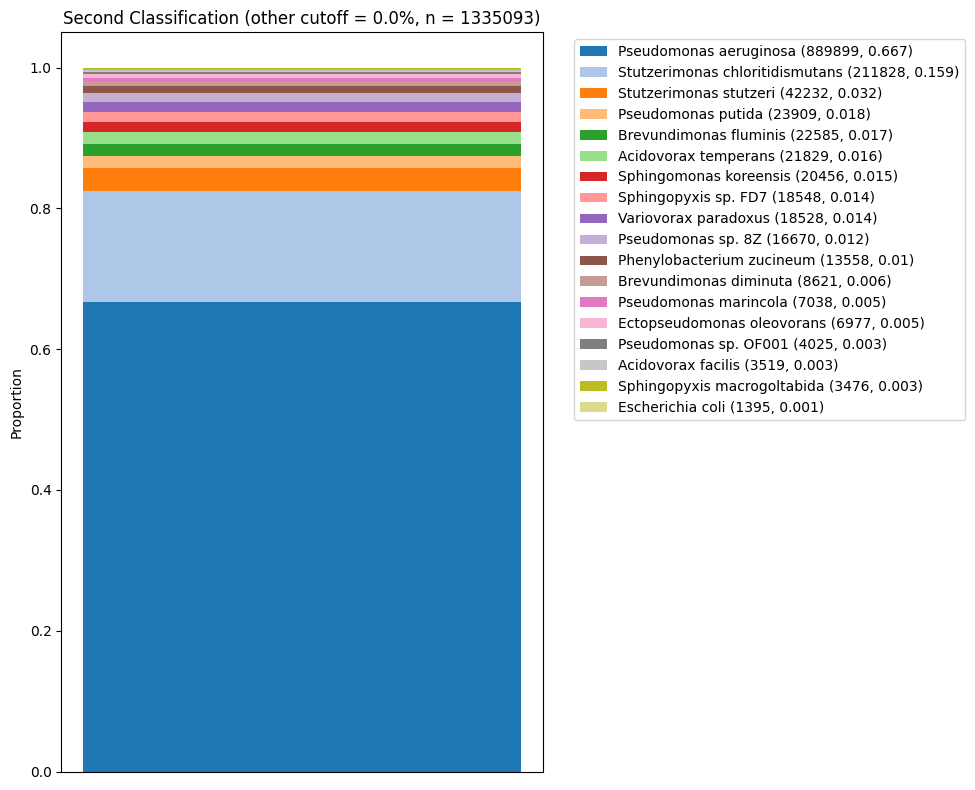

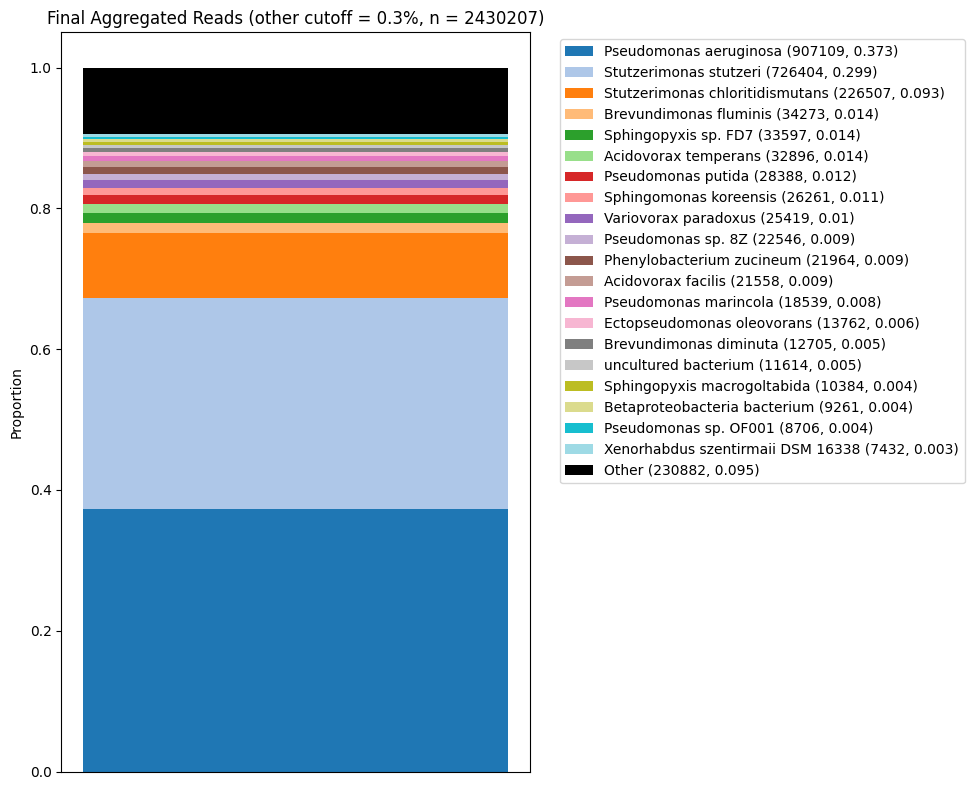

In [5]:
from src import taxo_utils

taxo_utils.create_stacked_bar_plot(cl_df, "Classified Reads")
taxo_utils.create_stacked_bar_plot(un_df, "Second Classification", cutoff = 0.0)
taxo_utils.create_stacked_bar_plot(agg_df, "Final Aggregated Reads", cutoff = 0.003)

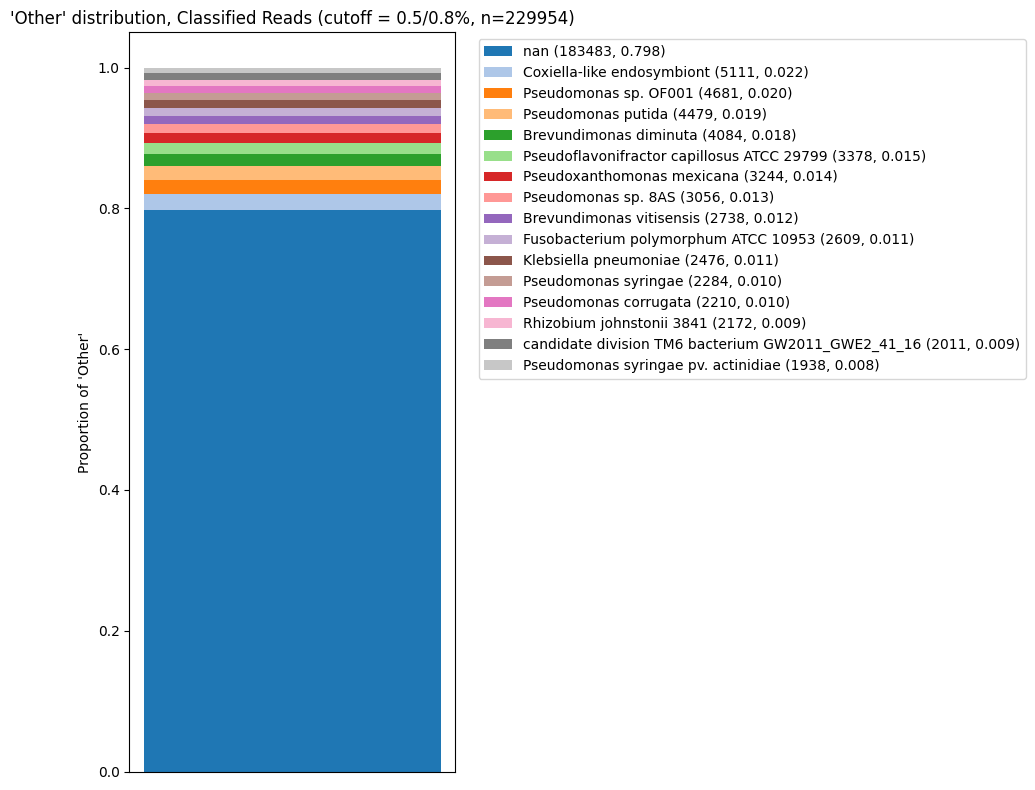

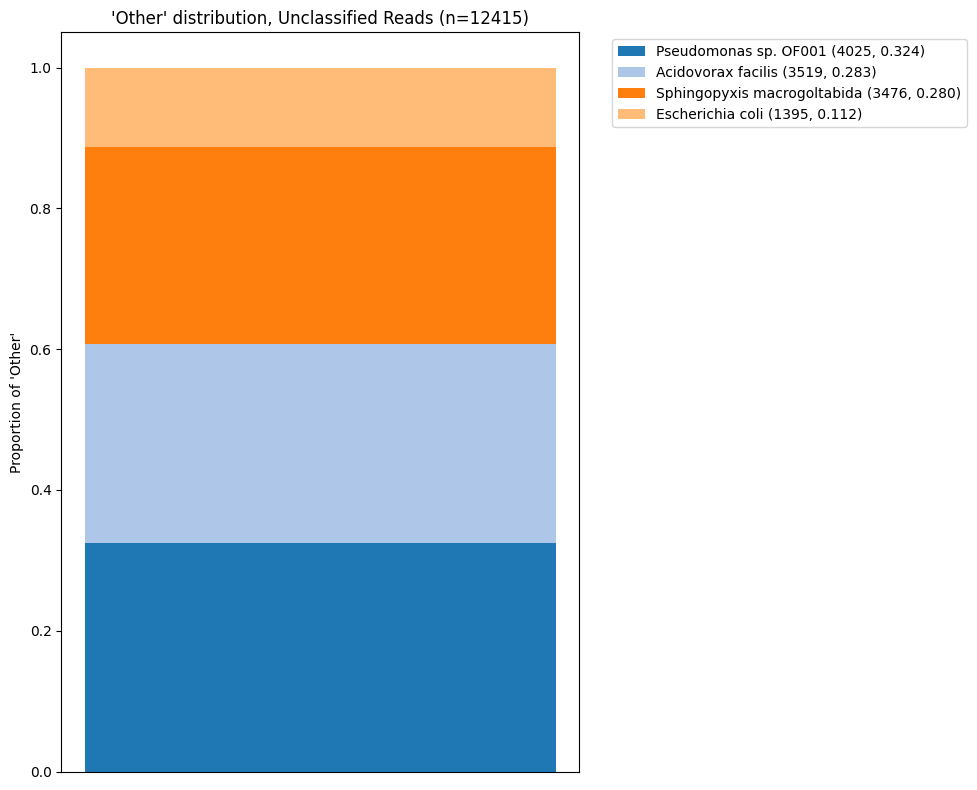

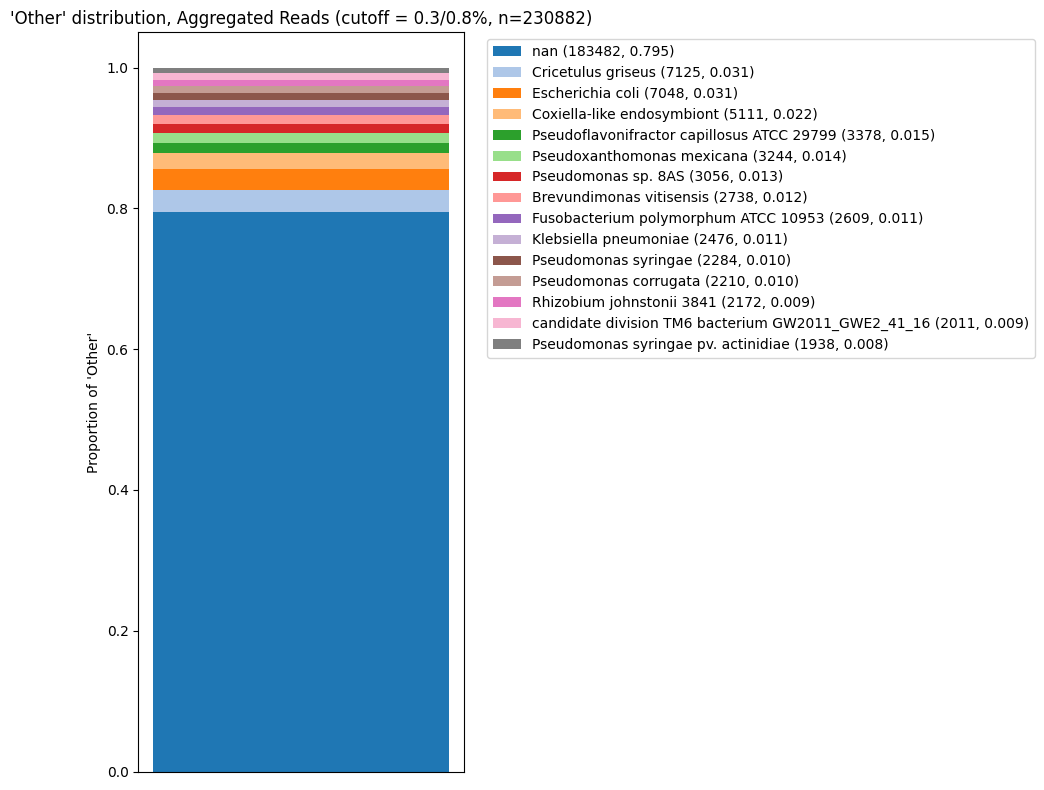

In [6]:
taxo_utils.plot_other_category(cl_df, "Classified Reads", cutoff=0.005, other_cutoff = 0.008)
taxo_utils.plot_other_category(un_df, "Unclassified Reads", cutoff=0.005, other_cutoff = 0.008)
taxo_utils.plot_other_category(agg_df, "Aggregated Reads", cutoff=0.003, other_cutoff = 0.008)
